In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Caminho para o arquivo
arquivo = 'DADOS\MICRODADOS_ENEM_2017.csv'

# Lê uma planilha Microdados ENEM
df_2017 = pd.read_csv(arquivo, encoding="latin1", sep=';',nrows=1500000)

'''# Caminho para o arquivo
arquivo = '2018\DADOS\MICRODADOS_ENEM_2018.csv'

# Lê uma planilha Microdados ENEM
df_2018 = pd.read_csv(arquivo, encoding="latin1", sep=';',nrows=1000000)
#print(df_2017.columns)
'''
# Ordena as maiores médias
df_2017['NOTA_TOTAL'] = df_2017[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].sum(axis=1)/5
#df_2018['NOTA_TOTAL'] = df_2018[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].sum(axis=1)/5
top_total = df_2017.sort_values(by='NOTA_TOTAL', ascending=False).head(2500)

#print(top_total["TP_COR_RACA"])
print("dados Extraídos")

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ericr\AppData\Local\Temp\ipykernel_18796\1500045412.py:2: SyntaxWarning: invalid escape sequence '\M'
  arquivo = 'DADOS\MICRODADOS_ENEM_2017.csv'
C:\Users\ericr\AppData\Local\Temp\ipykernel_18796\1500045412.py:7: SyntaxWarning: invalid escape sequence '\D'
  '''# Caminho para o arquivo


dados Extraídos


In [3]:
# Dicionários
TP_escola = {1:"Não respondeu",2:"Pública",3:"Privada",4:"Exterior"}
uf_para_regiao = {
    11: 'RO',   # RO
    12: 'AC',   # AC
    13: 'AM',   # AM
    14: 'RR',   # RR
    15: 'PA',   # PA
    16: 'AP',   # AP
    17: 'TO',   # TO
    21: 'MA',# MA
    22: 'PI',# PI
    23: 'CE',# CE
    24: 'RN',# RN
    25: 'PB',# PB
    26: 'PE',# PE
    27: 'AL',# AL
    28: 'SE',# SE
    29: 'BA',# BA
    31: 'MG', # MG
    32: 'ES', # ES
    33: 'RJ', # RJ
    35: 'SP', # SP
    41: 'PR',     # PR
    42: 'SC',     # SC
    43: 'RS',     # RS
    50: 'MS', # MS
    51: 'MT', # MT
    52: 'GO', # GO
    53: 'DF'  # DF
}
renda_dict = {
    'A': 'Nenhuma renda',
    'B': 'Até R$ 998',
    'C': 'R$ 998–1.497',
    'D': 'R$ 1.497–1.996',
    'E': 'R$ 1.996–2.495',
    'F': 'R$ 2.495–2.994',
    'G': 'R$ 2.994–3.992',
    'H': 'R$ 3.992–4.990',
    'I': 'R$ 4.990–5.988',
    'J': 'R$ 5.988–6.986',
    'K': 'R$ 6.986–7.984',
    'L': 'R$ 7.984–8.982',
    'M': 'R$ 8.982–9.980',
    'N': 'R$ 9.980–11.976',
    'O': 'R$ 11.976–14.970',
    'P': 'R$ 14.970–19.960',
    'Q': 'Acima de R$ 19.960',
}

# Mapeamento da cor/raça
raca_dict = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}

'''
Essa seção corresponde aos dicionários de conversão dos questionários
'''

#print(TP_escola[1])
#cont_escola = pd.DataFrame(map(lambda x: TP_escola[x],top_total["TP_ESCOLA"].values)).value_counts()
#print(cont_escola)

#print(top_total["NO_MUNICIPIO_ESC"].value_counts())
media = df_sem_zero = df_2017[df_2017['NOTA_TOTAL'] > 0].copy()["NOTA_TOTAL"].median()
print(media)


523.5600000000001


In [4]:
# Agrupar estatísticas por faixa de renda
estatisticas = df_2017.groupby('Q006')['NOTA_TOTAL'].agg(
    media='mean',
    desvio='std',
    mediana='median'
).reset_index()

# Adicionar nome legível da renda
estatisticas['Renda'] = estatisticas['Q006'].map(renda_dict)

# Ordenar pela ordem natural das faixas de renda
estatisticas = estatisticas.sort_values(by='Q006')
display(estatisticas)

,Q006,media,desvio,mediana,Renda
0,A,332.166006,229.211284,443.04,Nenhuma renda
1,B,359.631385,223.726333,461.16,Até R$ 998
2,C,370.573699,233.082310,478.28,R$ 998–1.497
3,D,391.613829,234.292349,494.42,R$ 1.497–1.996
4,E,413.376050,231.619267,508.34,R$ 1.996–2.495
5,F,440.692389,226.448411,525.44,R$ 2.495–2.994
6,G,464.679051,219.186011,539.64,R$ 2.994–3.992
7,H,491.624995,210.612620,556.84,R$ 3.992–4.990
8,I,518.328218,202.363046,576.27,R$ 4.990–5.988
9,J,536.703627,195.227700,590.76,R$ 5.988–6.986


C:\Users\ericr\AppData\Local\Temp\ipykernel_18796\1683391758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_renda.index.map(renda_dict), y=media_por_renda.values, palette='Blues_d')


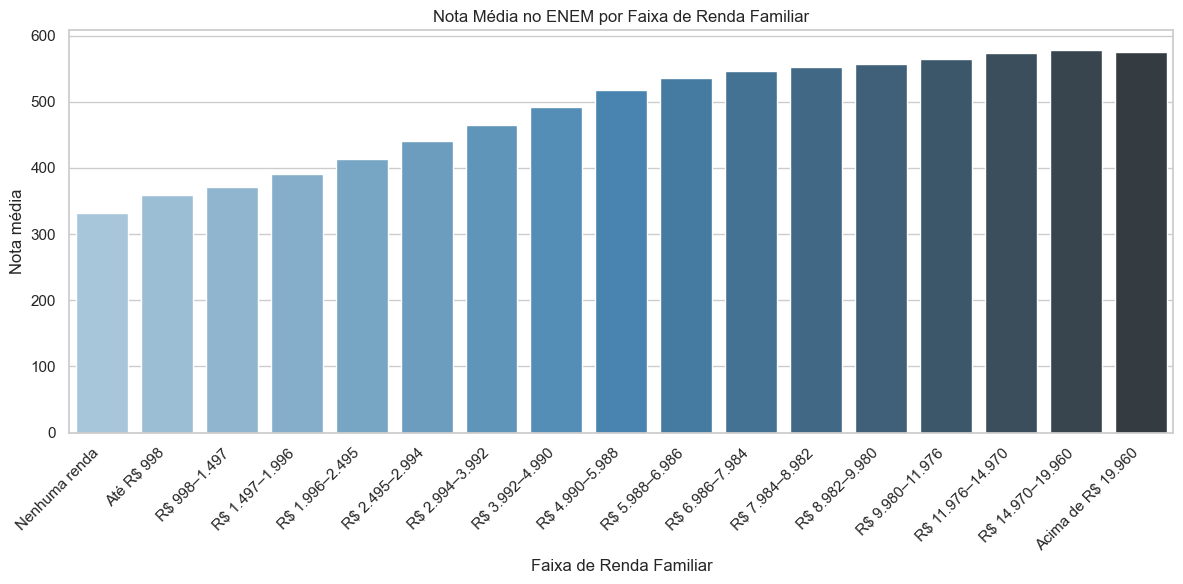

In [5]:
def Grafico_nota_por_renda(df):
    # Estilo visual
    sns.set_theme(style="whitegrid")

    # Remover entradas sem nota ou sem renda informada
    df_filtrado = df[['Q006', 'NOTA_TOTAL']].dropna()

    # Agrupar pela faixa de renda e calcular média
    media_por_renda = df_filtrado.groupby('Q006')['NOTA_TOTAL'].mean().sort_index()
    
    # Plotar
    plt.figure(figsize=(12, 6))
    sns.barplot(x=media_por_renda.index.map(renda_dict), y=media_por_renda.values, palette='Blues_d')

    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Nota média')
    plt.xlabel('Faixa de Renda Familiar')
    plt.title('Nota Média no ENEM por Faixa de Renda Familiar')
    plt.tight_layout()
    plt.show()

Grafico_nota_por_renda(df_2017)
#Grafico_nota_por_renda(df_2018)

C:\Users\ericr\AppData\Local\Temp\ipykernel_31016\3293339392.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_regiao.index, y=media_por_regiao.values, palette='Blues_d')


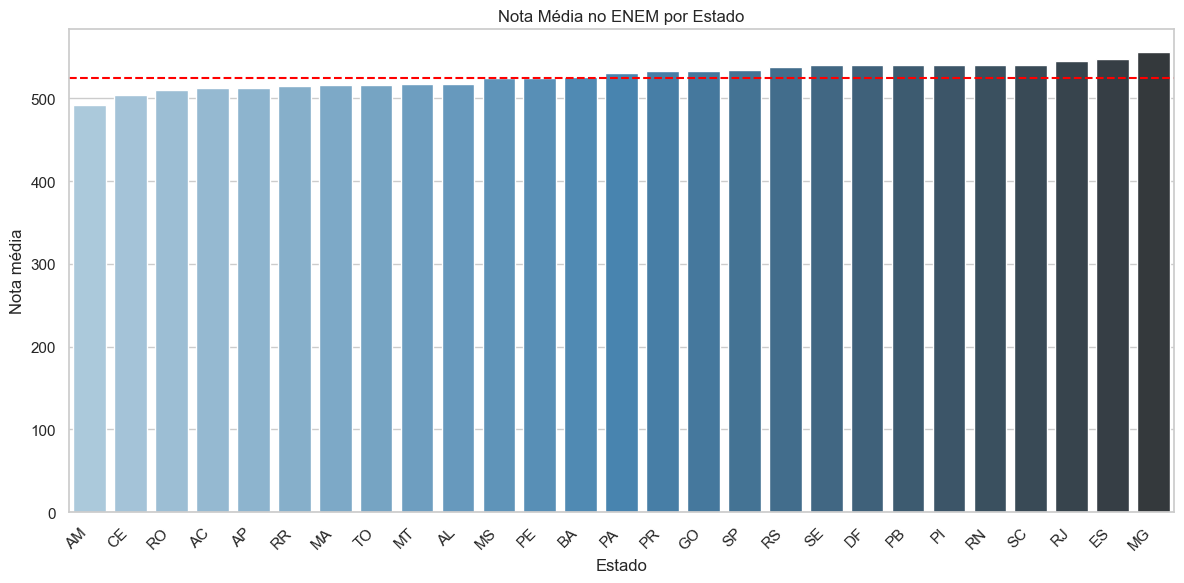

C:\Users\ericr\AppData\Local\Temp\ipykernel_31016\3293339392.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_regiao.index, y=media_por_regiao.values, palette='Blues_d')


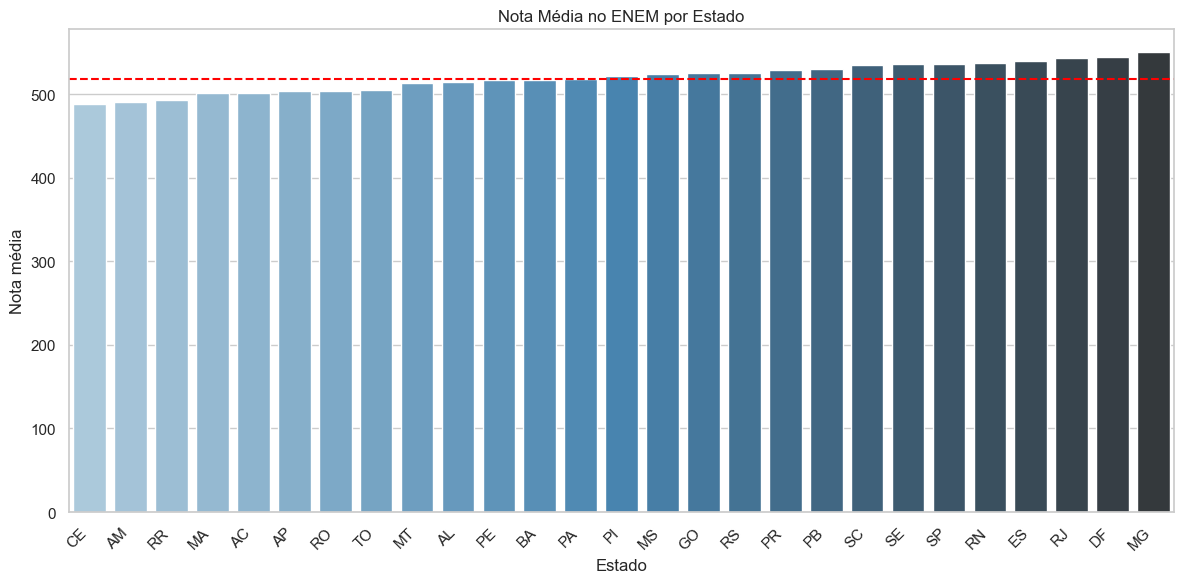

In [ ]:
def Gráfico_nota_por_estado(df): 
    df['REGIAO'] = df["CO_MUNICIPIO_ESC"].dropna().astype(str).str[:2].astype(int).map(uf_para_regiao)
    df_sem_zero = df[df['NOTA_TOTAL'] > 0].copy()
    media_nacional = df_sem_zero["NOTA_TOTAL"].mean()
    df_plot = df_sem_zero[['REGIAO', 'NOTA_TOTAL']].dropna()
    media_por_regiao = df_plot.groupby('REGIAO')['NOTA_TOTAL'].mean().sort_values()

    #print(df_plot)
    # Plotar
    plt.figure(figsize=(12, 6))
    sns.barplot(x=media_por_regiao.index, y=media_por_regiao.values, palette='Blues_d')
    plt.axhline(media_nacional, color='red', linestyle='--', label='Média Nacional')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Nota média')
    plt.xlabel('Estado')
    plt.title('Nota Média no ENEM por Estado')
    plt.tight_layout()
    plt.show()

Gráfico_nota_por_estado(df_2017)

C:\Users\ericr\AppData\Local\Temp\ipykernel_31016\976508790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_raca.index.map(raca_dict), y=media_raca.values, palette='Set2')


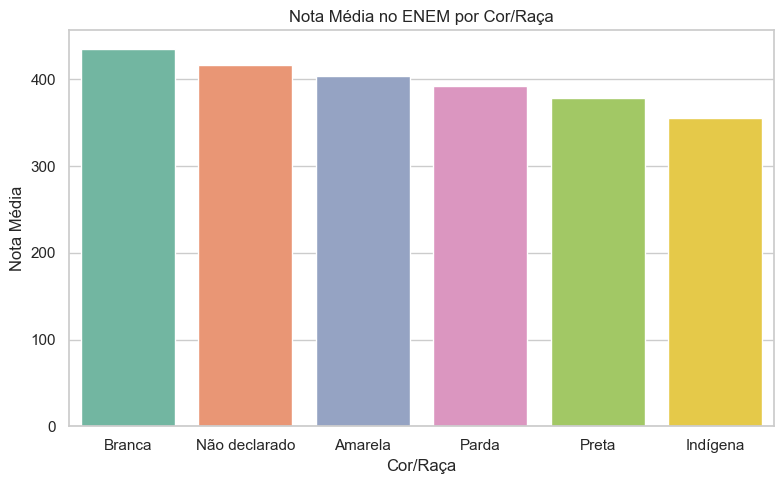

C:\Users\ericr\AppData\Local\Temp\ipykernel_31016\976508790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_raca.index.map(raca_dict), y=media_raca.values, palette='Set2')


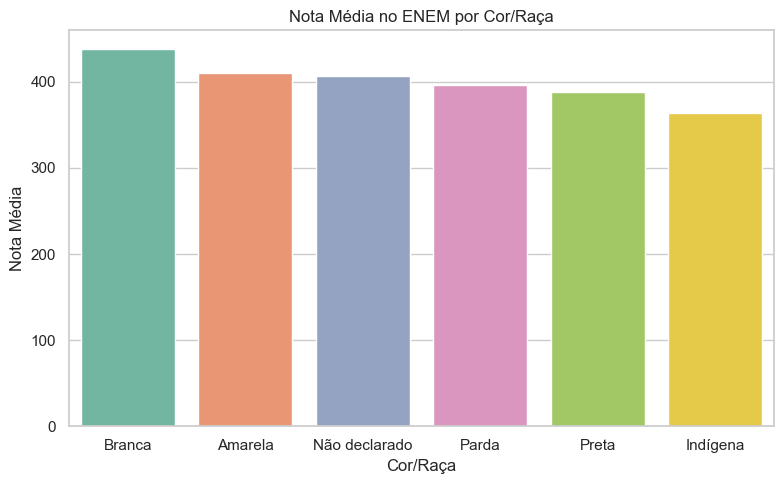

In [ ]:

def Media_por_raca(df):
    df_filtrado = df[["TP_COR_RACA","NOTA_TOTAL"]].dropna()

    # Agrupar e calcular média
    media_raca = df_filtrado.groupby('TP_COR_RACA')['NOTA_TOTAL'].mean().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=media_raca.index.map(raca_dict), y=media_raca.values, palette='Set2')
    plt.ylabel('Nota Média')
    plt.xlabel('Cor/Raça')
    plt.title('Nota Média no ENEM por Cor/Raça')
    plt.tight_layout()
    plt.show()

Media_por_raca(df_2017)

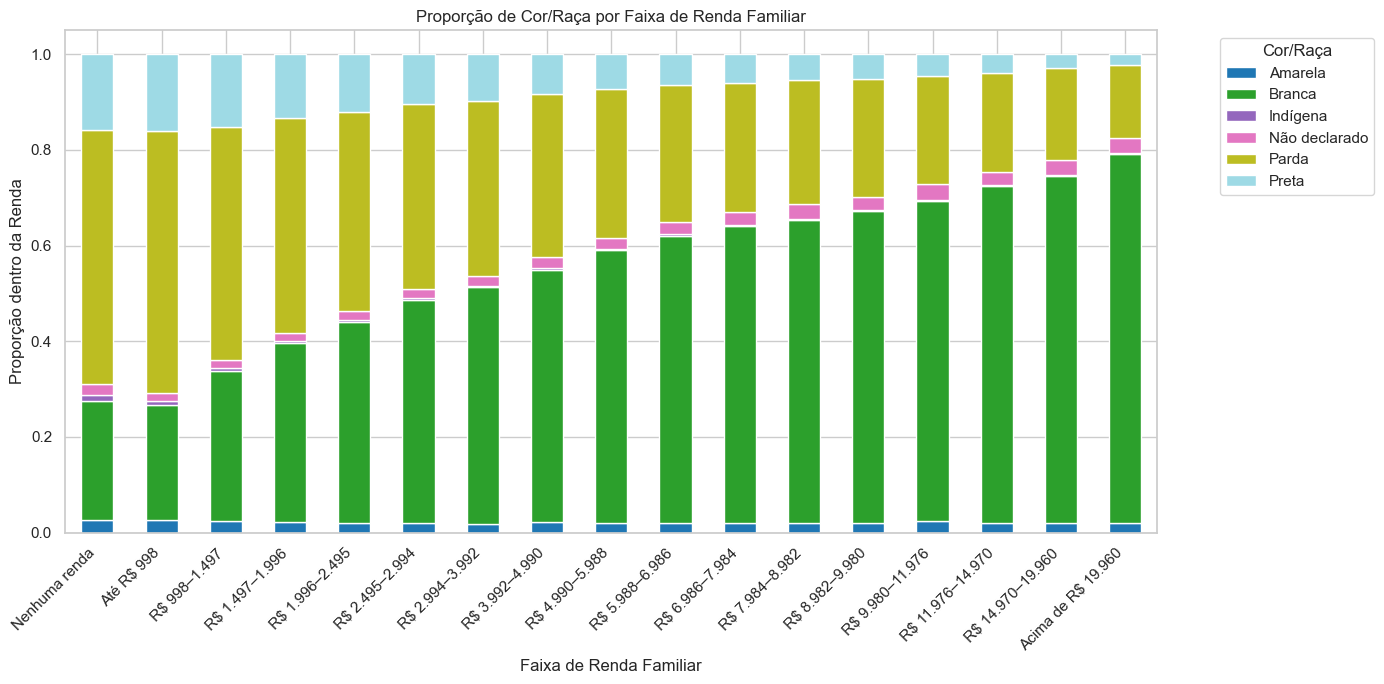

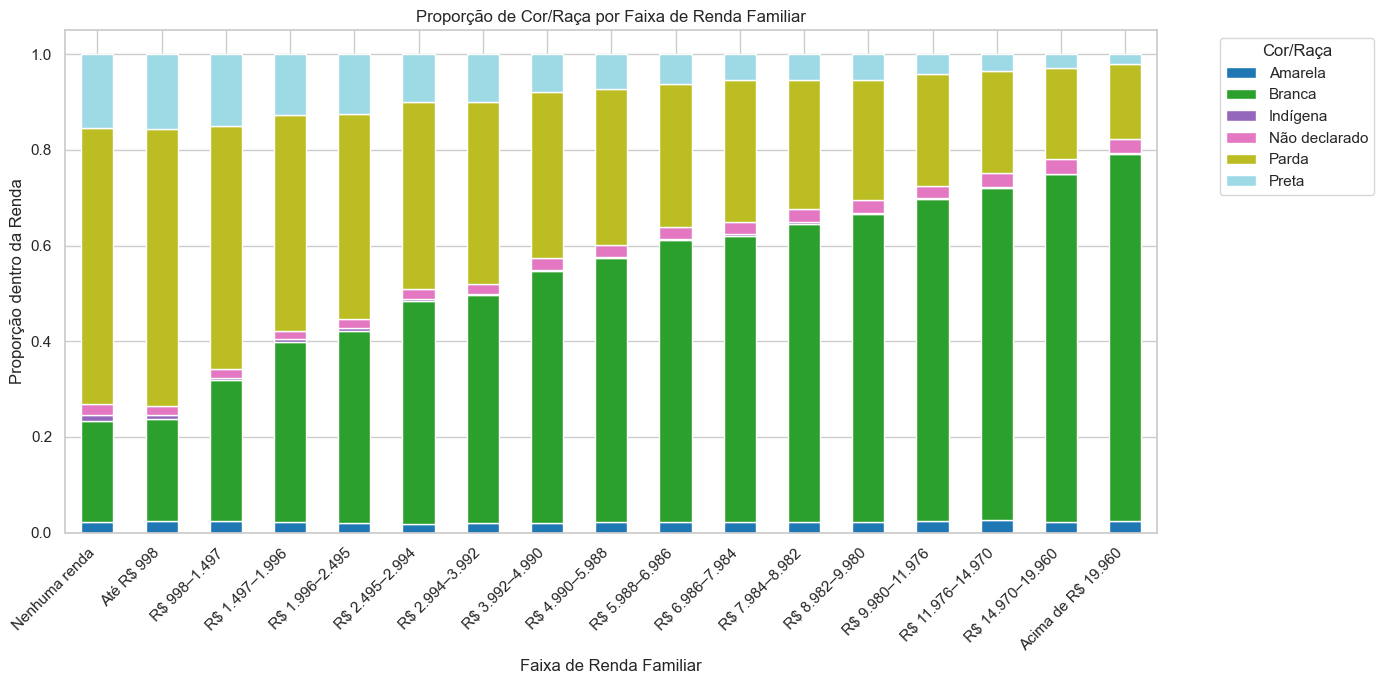

In [ ]:
def Grafico_renda_por_raca(df):
    df_filtrado = df[["Q006","TP_COR_RACA"]].dropna()
    df_filtrado["TP_COR_RACA"] = df_filtrado["TP_COR_RACA"].map(raca_dict)
    contagem = df_filtrado.groupby(['Q006', 'TP_COR_RACA']).size().unstack(fill_value=0)
    contagem.rename(index=renda_dict, inplace=True)
    # Calcular proporção por faixa de renda
    proporcoes = contagem.div(contagem.sum(axis=1), axis=0)

    # Plotar gráfico de barras empilhadas
    proporcoes.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
    plt.title('Proporção de Cor/Raça por Faixa de Renda Familiar')
    plt.xlabel('Faixa de Renda Familiar')
    plt.ylabel('Proporção dentro da Renda')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Grafico_renda_por_raca(df_2017)

In [ ]:

arquivo = "data (1).xlsx"

df_idhm = pd.read_excel(arquivo,sheet_name="Worksheet")
idhm_educacao_2017 = df_idhm["IDHM Educação 2017"]
idhm_educacao_2018 = df_idhm["IDHM Educação 2018"]

nome_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

# Substituir o nome pelo código
df_idhm['UF'] = df_idhm["Territorialidades"].map(nome_para_sigla)

# Criar dicionário final
idhm_dict_2017 = dict(zip(df_idhm['UF'], df_idhm['IDHM Educação 2017']))
#idhm_dict_2018 = dict(zip(df_idhm['UF'], df_idhm['IDHM Educação 2018']))

df_2017['IDHM_EDUCACAO'] = df_2017['SG_UF_PROVA'].map(idhm_dict_2017)
#df_2018['IDHM_EDUCACAO'] = df_2018['REGIAO'].map(idhm_dict_2018)
display(df_2017.columns)
#display(df_2018)

colunas = ["NU_INSCRICAO","NU_ANO","TP_FAIXA_ETARIA","TP_SEXO","TP_COR_RACA","NO_MUNICIPIO_PROVA","SG_UF_PROVA","Q006","Q026","Q027","NOTA_TOTAL","IDHM_EDUCACAO"]
#df = pd.concat([df_2017[colunas], df_2018[colunas]], ignore_index=True)
#display(df_2017[colunas])

df_novo = df_2017[colunas]
df_novo["Q006"] = "Renda"

display(df_novo.head(20))


Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [ ]:
df_2017[colunas].to_csv('dados_utilizados_enem_2017.csv', index=False, encoding='utf-8')